# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

### Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles 

# Make 1000 examples 
n_samples = 1000
# Create circles 
X, y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [5]:
# Check out features 
X[:5]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343]])

In [4]:
# Check the labels
y[:4]

array([1, 1, 1, 1], dtype=int64)

#### Our data is a little hard to understand right now... let's visualize it!

In [7]:
import pandas as pd 
circles = pd.DataFrame({"X0": X[:, 0], 'X1': X[:, 1], 'label': y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


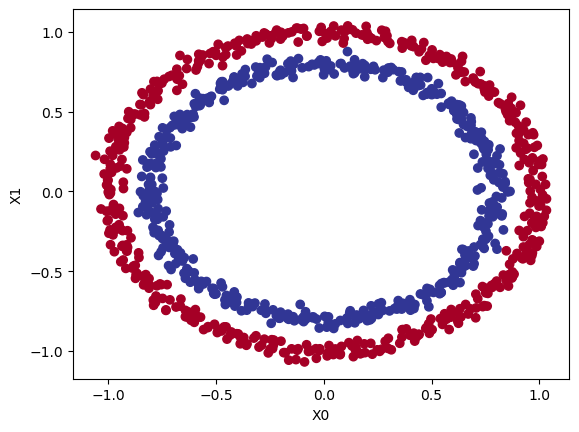

In [13]:
# visualize with a plot 
import matplotlib.pyplot as plt 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

### Input and Output shapes

In [14]:
# check the shape of our features and labels 
X.shape, y.shape

((1000, 2), (1000,))

In [15]:
# How many samples we're working 
len(X), len(y)

(1000, 1000)

In [16]:
# View the first example of features and labels 
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

### Steps in modelling

The steps in modelling with Tensorflow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate

In [17]:
import tensorflow as tf 
import tensorflow.keras as keras 
from keras import losses, optimizers, layers
 

In [18]:
# 0. Set the seed 
tf.random.set_seed(42)

# 1. Create the model 
model_1 = keras.models.Sequential(
    [
        layers.Dense(1)
    ]
)

# 2. Compile the modle 
model_1.compile(loss=losses.BinaryCrossentropy,
               optimizer=optimizers.SGD(),
               metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4938 - loss: 7.3229   
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4577 - loss: 8.6556 
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4577 - loss: 8.6552 
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4577 - loss: 8.6549 
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4577 - loss: 8.6546 


In [19]:
# Let's try and improve our model by training for longer..

model_1.fit(X, y, epochs=200, verbose=0)

In [21]:
model_1.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4955 - loss: 8.1322   


[8.059077262878418, 0.5]

Since we are working on a binary classification problem and our model is getting around 50% accuray it's performing as it's just guessing randomly

So let's step things up a notch and add another layer.

In [22]:
# set the seeds
tf.random.set_seed(42)

# Create a model, with two layers 
model_2 = keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model_2.compile(loss=losses.BinaryCrossentropy,
               optimizer=optimizers.SGD(),
               metrics=['accuracy'])

# 3. Fit the model 
model_2.fit(X, y, epochs=100, verbose=0)

In [23]:
# 4. Evaluate the model 
model_2.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4985 - loss: 0.6925  


[0.6932635307312012, 0.47999998927116394]

Still 50% accuracy no good than random guessing.

### Imporving our model 

Let's look into our bag of tricks to see how we can improve oru model.

1. Create a model - we might want to add more layers, more hidden units.
2. Compiling a model - we might want to choose a different optimization function maybe Adam 
3. Fitting a model - Perhaps we might fit our model for more epochs (leave it training for longer.)

In [24]:
# Set the random seed 
tf.random.set_seed(42)

# 1. Create a model (this time 3 layers )
model_3 = keras.Sequential(
    [
        layers.Dense(100),
        layers.Dense(10),
        layers.Dense(1)
    ]
)

# 2. Compile the model 
model_3.compile(
    loss=losses.BinaryCrossentropy,
    optimizer=optimizers.Adam(),
    metrics=['accuracy']
)

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [25]:
# Evaluate the model 
model_3.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5083 - loss: 0.6915  


[0.6949397325515747, 0.48899999260902405]

**What still aroung 50% accuracy - still random guessing what's happening???**

To visualize our model's predictions, let's create a function `plot_decision_boundary`, this function will:

* Take in a trained model, features (X), labels (y)
* Create a meshgrid of the diffrent X values 
* Make predictions across the meshgrid 
* Plot the predictions as well as a line between zones (where each unique class falls)

In [29]:
import numpy as np 
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    """

    # Define the axis boundaries of the plot and create a meshgrid 
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))

    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

    # Make predictions 
    y_pred = model.predict(x_in)

    # check for multi-class 
    if len(y_pred[0]) > 1:
        print('doing multiclass classification')
        # We have to reshape our prediction to get them ready for plotting 
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)

    else:
        print('doing binary classification')
        y_pred = np.round(y_pred).reshape(xx.shape)

    # plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
 
    

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  
doing binary classification


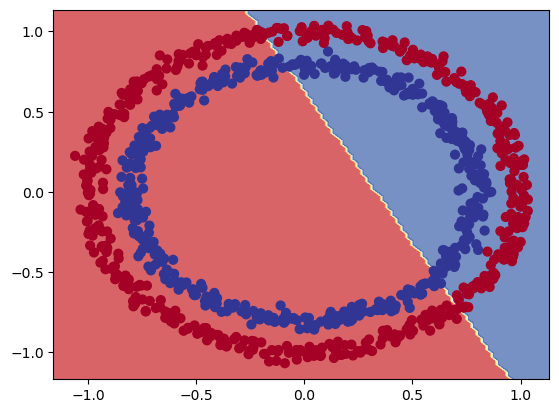

In [30]:
# check out the predictions our model is making 
plot_decision_boundary(model_3, 
                      X, 
                      y)

**OOHHHHH our data is not seperable using straight line we need something curvyyyyyy**